In [4]:
!pip install ultralytics
!pip install roboflow
!pip install -U ipywidgets
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 15.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.

In [6]:
from roboflow import Roboflow
from ultralytics import RTDETR
from ultralytics import solutions
import yaml
import cv2
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")

In [3]:
rf = Roboflow(api_key="LOe9sWJ4WskO7PBuo6CK")
project = rf.workspace("monash-ventz").project("beach-waste-vqths")
version = project.version(2)
dataset = version.download("yolov11")            

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Beach-Waste-2 in yolov11:: 100%|██████████| 7044/7044 [00:01<00:00, 6939.34it/s]


In [4]:
def read_yaml(file_name):
  with open(file_name, 'r') as file:
    data = yaml.safe_load(file)
  return data

def create_model():
  model = RTDETR("rtdetr-l.pt")
  return model, model.info()

def write_yaml(file_name, data):
  with open(file_name, 'w') as file:
    yaml.safe_dump(data, file)

def replace_word(data, old_word, new_word):
  if isinstance(data, dict):
    for key, value in data.items():
      if isinstance(value, (dict, list)):
        replace_word(value, old_word, new_word)
      elif isinstance(value, str):
        data[key] = value.replace(old_word, new_word)
  elif isinstance(data, list):
    for item in data:
      if isinstance(item, (dict, list)):
        replace_word(item, old_word, new_word)
      elif isinstance(item, str):
        data[data.index(item)] = item.replace(old_word, new_word)

model, info = create_model()
data_name = dataset.location + '/data.yaml'
data = read_yaml(data_name)

replace_word(data, '../train/images', 'train/images')
replace_word(data, '../valid/images', 'valid/images')
replace_word(data, '../test/images', 'test/images')

write_yaml(data_name, data)
info

100%|██████████| 63.4M/63.4M [00:02<00:00, 27.8MB/s]


rt-detr-l summary: 673 layers, 32,970,476 parameters, 0 gradients, 108.3 GFLOPs


(673, 32970476, 0, 108.3437056)

In [5]:
model.train(data=data_name, epochs=20, imgsz=640)

Ultralytics 8.3.33 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/kaggle/working/Beach-Waste-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 3.74MB/s]


Overriding model.yaml nc=80 with nc=7
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.2MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Beach-Waste-2/train/labels... 2675 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2675/2675 [00:02<00:00, 1111.80it/s]


train: New cache created: /kaggle/working/Beach-Waste-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Beach-Waste-2/valid/labels... 561 images, 0 backgrounds, 0 corrupt: 100%|██████████| 561/561 [00:00<00:00, 1033.08it/s]


val: New cache created: /kaggle/working/Beach-Waste-2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       1/20        15G     0.9537       4.58     0.3144         20        640: 100%|██████████| 168/168 [03:45<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]

                   all        561       2558      0.582      0.506      0.463      0.327



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       2/20      14.2G     0.6155     0.7979     0.1526         51        640: 100%|██████████| 168/168 [03:41<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.682      0.581      0.573      0.416



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       3/20      14.8G     0.5899     0.7365     0.1446         18        640: 100%|██████████| 168/168 [03:40<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.723       0.57       0.58      0.423



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       4/20      14.9G     0.5649     0.7228     0.1353         15        640: 100%|██████████| 168/168 [03:40<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.748      0.644      0.678      0.478



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       5/20      15.1G     0.5502     0.7085     0.1329         23        640: 100%|██████████| 168/168 [03:39<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.725        0.6      0.637      0.459



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       6/20      14.8G     0.5484     0.6858      0.128         17        640: 100%|██████████| 168/168 [03:39<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.746      0.663      0.705      0.517



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       7/20      14.8G     0.5326     0.6881     0.1221         33        640: 100%|██████████| 168/168 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.768      0.689      0.727      0.528



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       8/20      14.9G     0.5312     0.6625     0.1239         39        640: 100%|██████████| 168/168 [03:39<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.787      0.687      0.732      0.535



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


       9/20      15.1G     0.5179     0.6572     0.1161         39        640: 100%|██████████| 168/168 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.812      0.698      0.759      0.555



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      10/20      15.1G     0.5109     0.6537     0.1155         54        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.731      0.685      0.703      0.518


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      11/20      14.8G     0.4752     0.6504     0.1131         22        640: 100%|██████████| 168/168 [03:39<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.813      0.706      0.759      0.552



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      12/20        15G     0.4598     0.6281     0.1105          6        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.801      0.698      0.759      0.563



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      13/20      15.1G     0.4541     0.6237     0.1077         10        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.805      0.701      0.762      0.563



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      14/20      14.9G     0.4528     0.6145     0.1027         14        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.818      0.714      0.766      0.571



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      15/20      14.9G     0.4484     0.6031     0.1026         19        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.53it/s]

                   all        561       2558      0.843      0.725      0.793      0.593



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      16/20        15G     0.4426     0.5886     0.1017         31        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.816      0.743      0.804      0.596



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      17/20      15.1G     0.4334      0.579    0.09961         30        640: 100%|██████████| 168/168 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.816       0.75      0.793      0.589



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      18/20      15.1G     0.4278     0.5595    0.09767         10        640: 100%|██████████| 168/168 [03:37<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.846      0.741      0.801      0.597



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      19/20      15.1G     0.4195     0.5546    0.09425         13        640: 100%|██████████| 168/168 [03:37<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.851      0.744      0.809      0.605



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


      20/20      14.9G     0.4212     0.5399    0.09291         15        640: 100%|██████████| 168/168 [03:37<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.54it/s]

                   all        561       2558      0.833      0.764      0.809      0.605



20 epochs completed in 1.299 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 66.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 66.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.33 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
rt-detr-l summary: 502 layers, 31,998,125 parameters, 0 gradients, 103.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


                   all        561       2558       0.85      0.746       0.81      0.605
                Bottle        366        874      0.905      0.816      0.874       0.64
                 Metal        228        458      0.885      0.855      0.878      0.647
               Plastic        331        603       0.84      0.776      0.819      0.636
                  Rope        155        205      0.715      0.515      0.619      0.408
             Styrofoam        195        418      0.904      0.768      0.861      0.697
Speed: 0.1ms preprocess, 17.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0bb6c4baf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [6]:
# Validate the model
metrics = model.val() 
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps

Ultralytics 8.3.33 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
rt-detr-l summary: 502 layers, 31,998,125 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /kaggle/working/Beach-Waste-2/valid/labels.cache... 561 images, 0 backgrounds, 0 corrupt: 100%|██████████| 561/561 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:13<00:00,  2.65it/s]


                   all        561       2558      0.848      0.744       0.81      0.606
                Bottle        366        874      0.906      0.814      0.872      0.638
                 Metal        228        458      0.882      0.852      0.878      0.648
               Plastic        331        603      0.838      0.776      0.819      0.636
                  Rope        155        205      0.709      0.512      0.619      0.409
             Styrofoam        195        418      0.904      0.765      0.861      0.697
Speed: 0.2ms preprocess, 19.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train2


array([    0.63838,     0.60582,     0.64816,     0.63611,     0.40901,     0.69742,     0.60582])

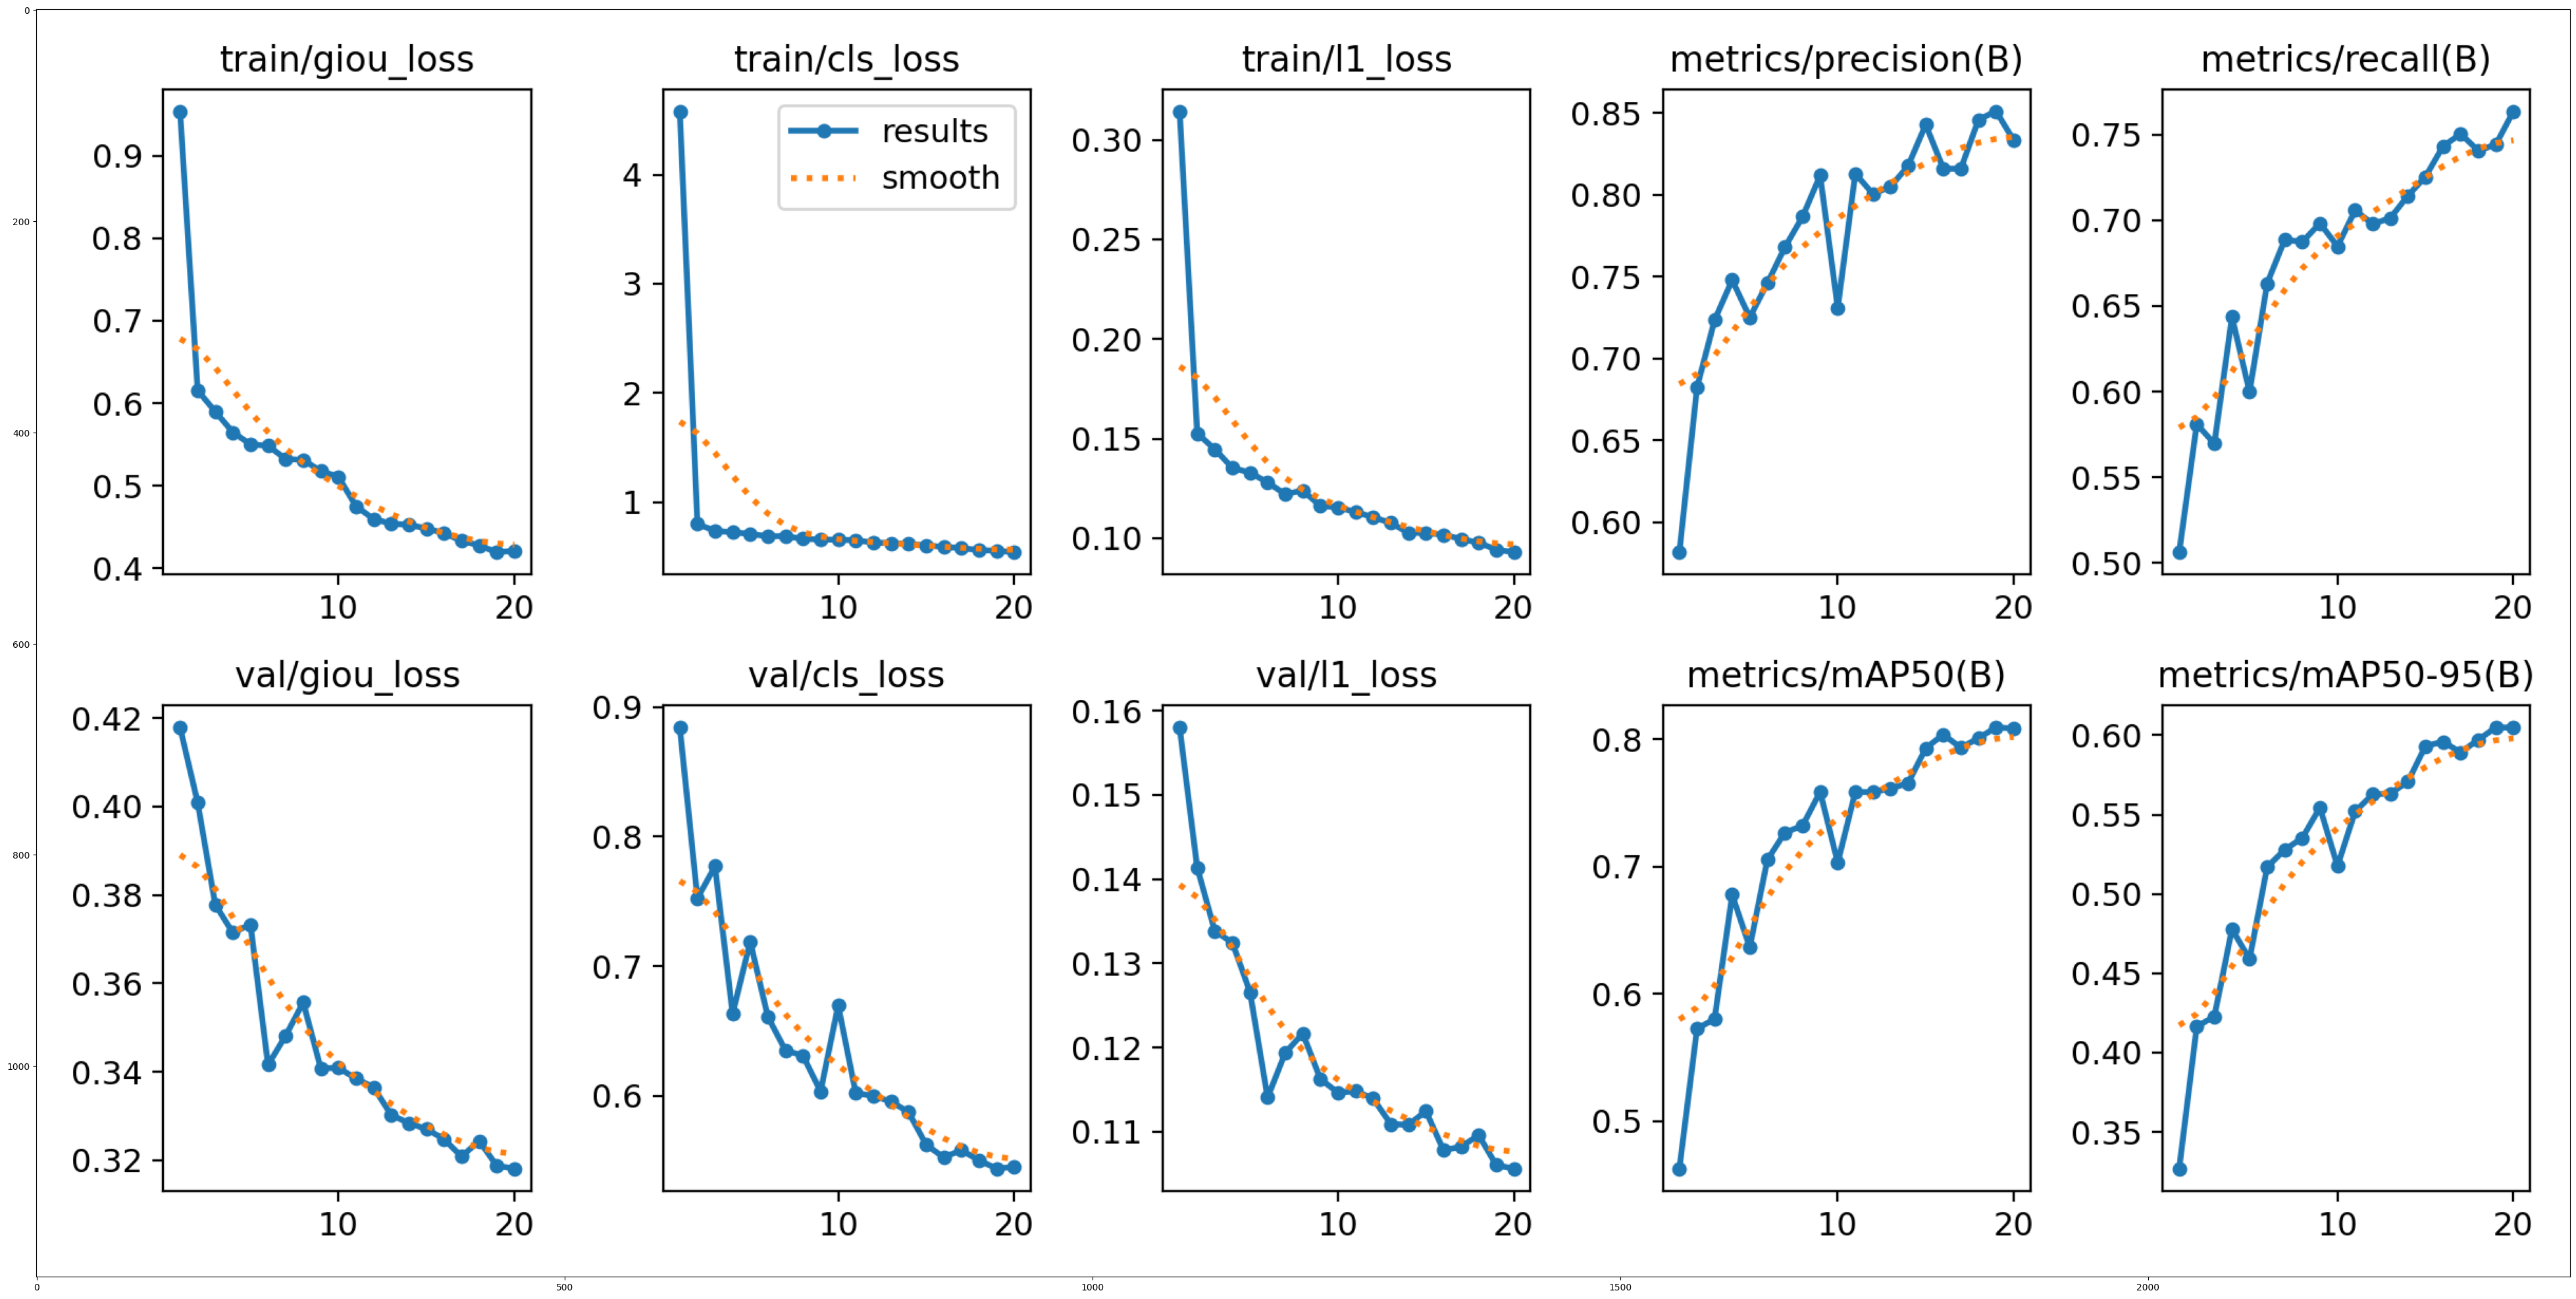

In [7]:
result_plot = plt.imread("/kaggle/working/runs/detect/train/results.png")
plt.figure(figsize=(50, 25))
plt.imshow(result_plot)
plt.show()

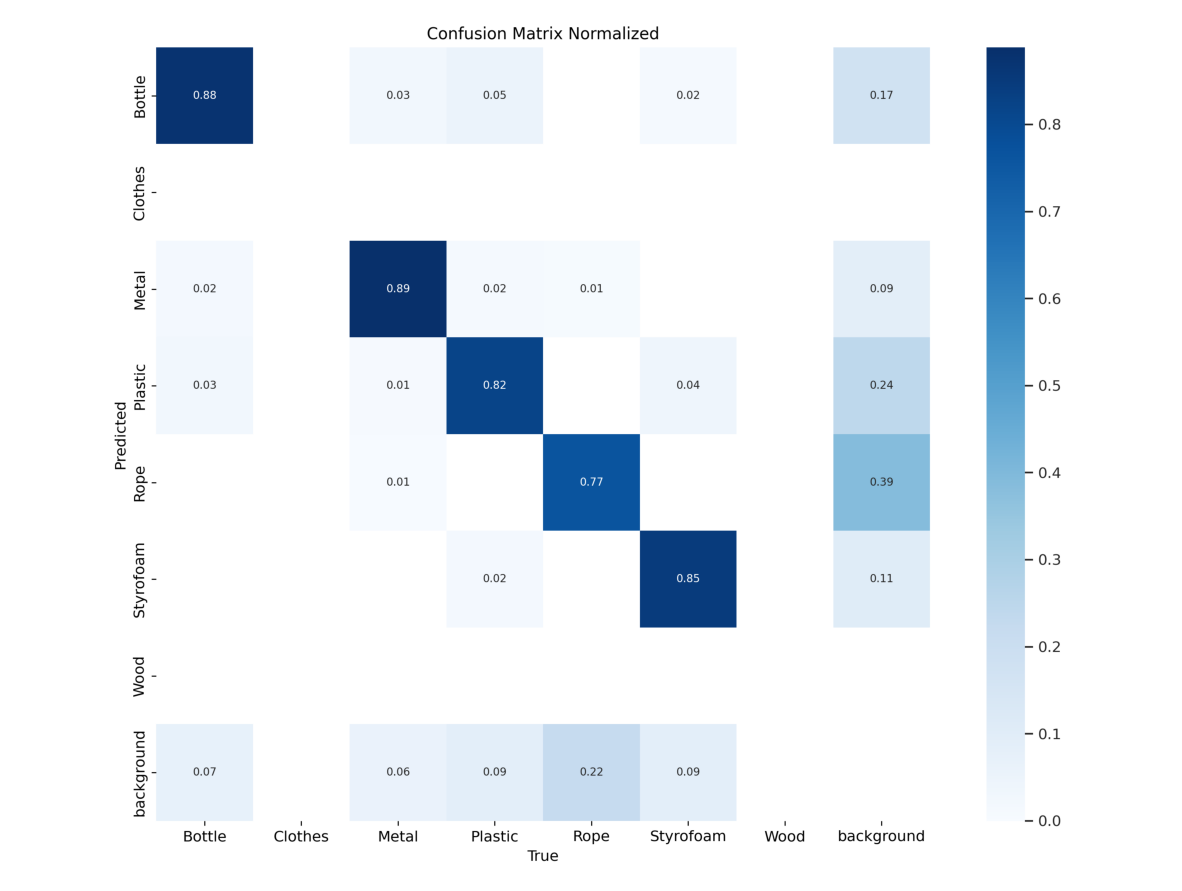

In [8]:
cm_n = plt.imread("/kaggle/working/runs/detect/train/confusion_matrix_normalized.png")
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cm_n)

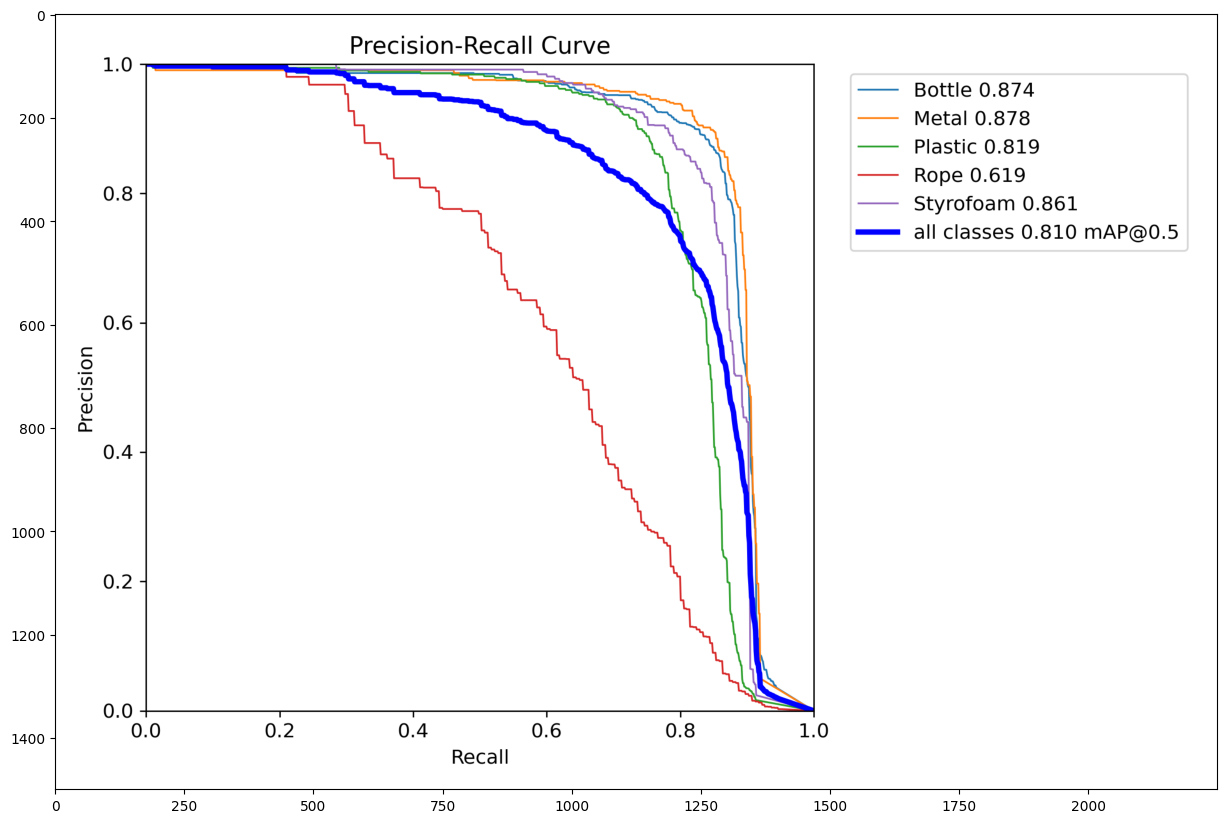

In [9]:
result = plt.imread("/kaggle/working/runs/detect/train/PR_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

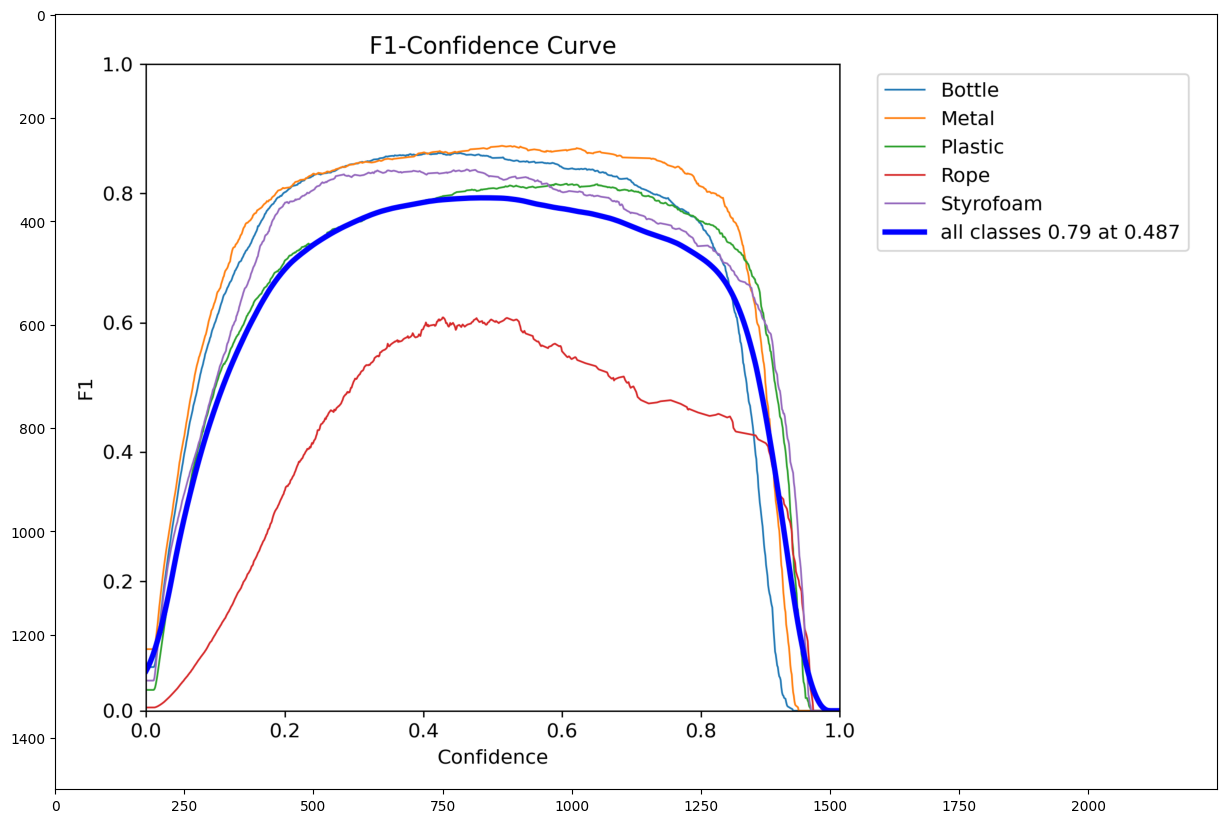

In [10]:
result = plt.imread("/kaggle/working/runs/detect/train/F1_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

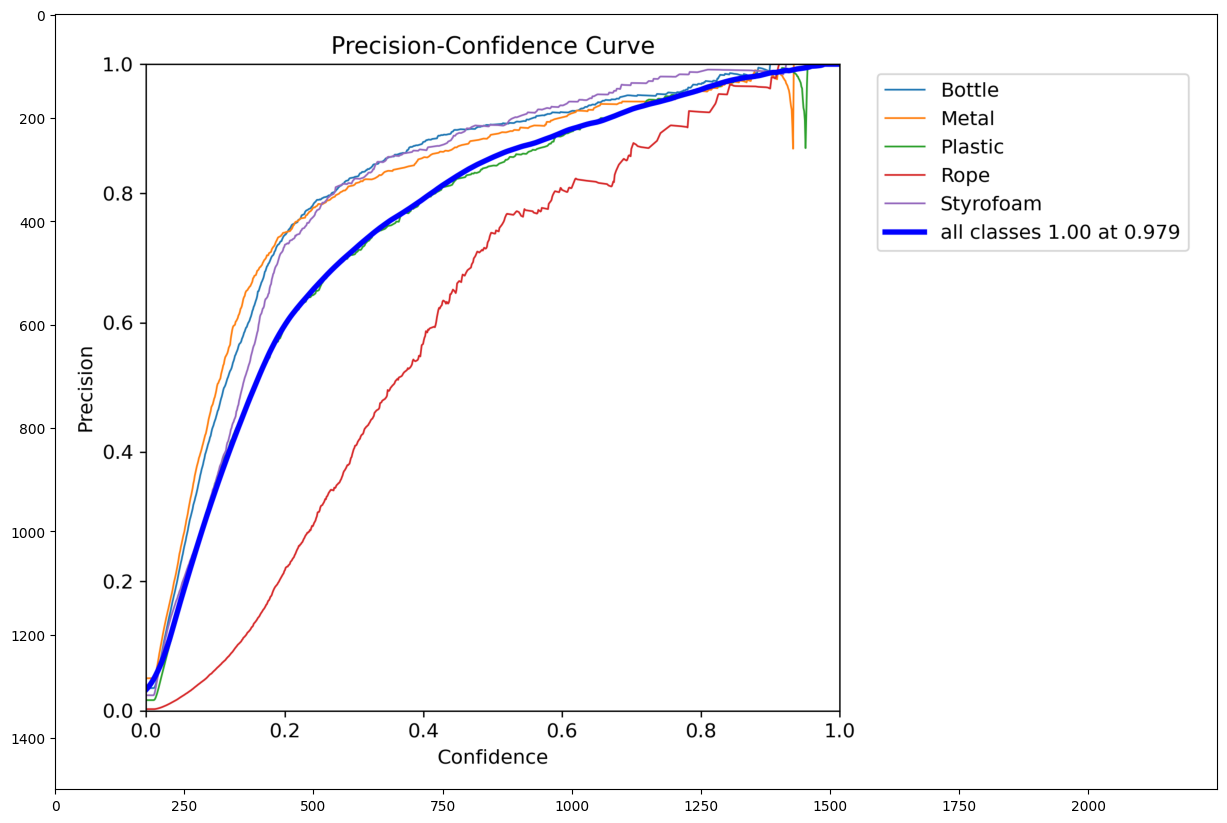

In [11]:
result = plt.imread("/kaggle/working/runs/detect/train/P_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

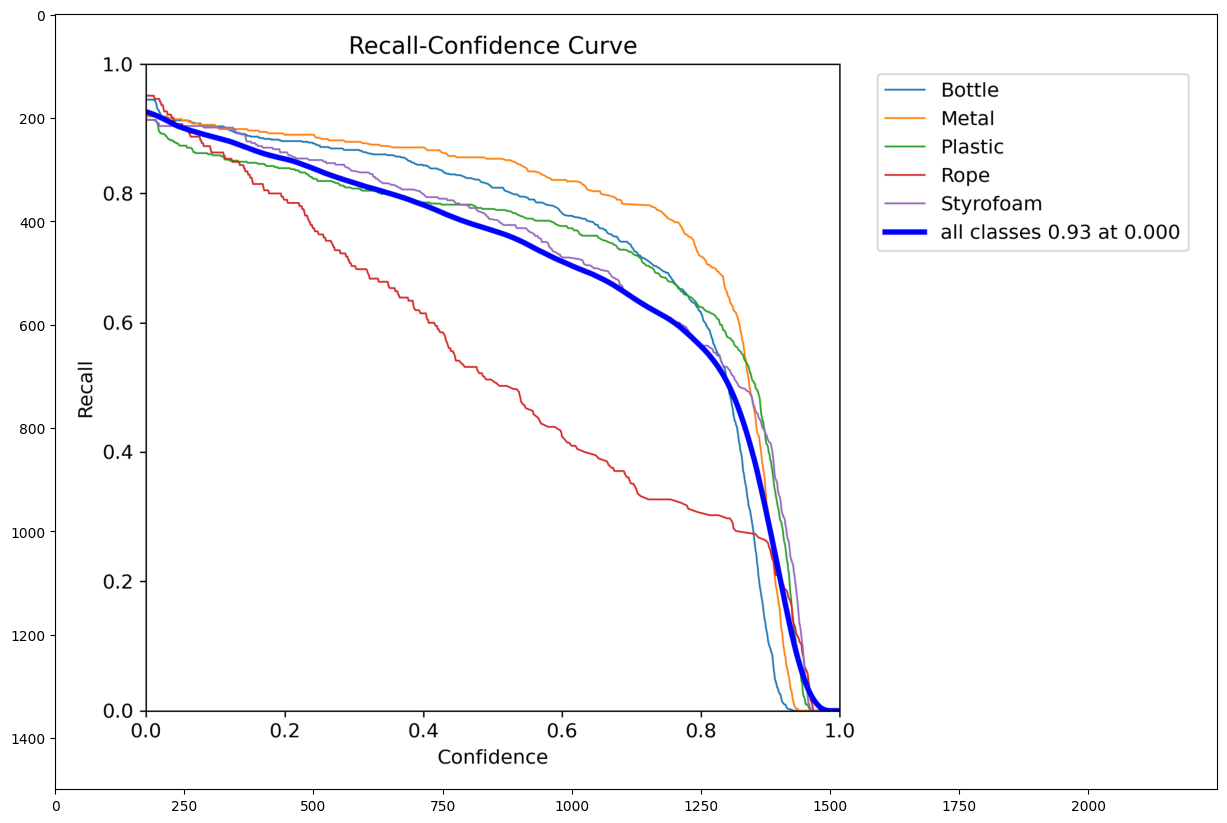

In [12]:
result = plt.imread("/kaggle/working/runs/detect/train/R_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

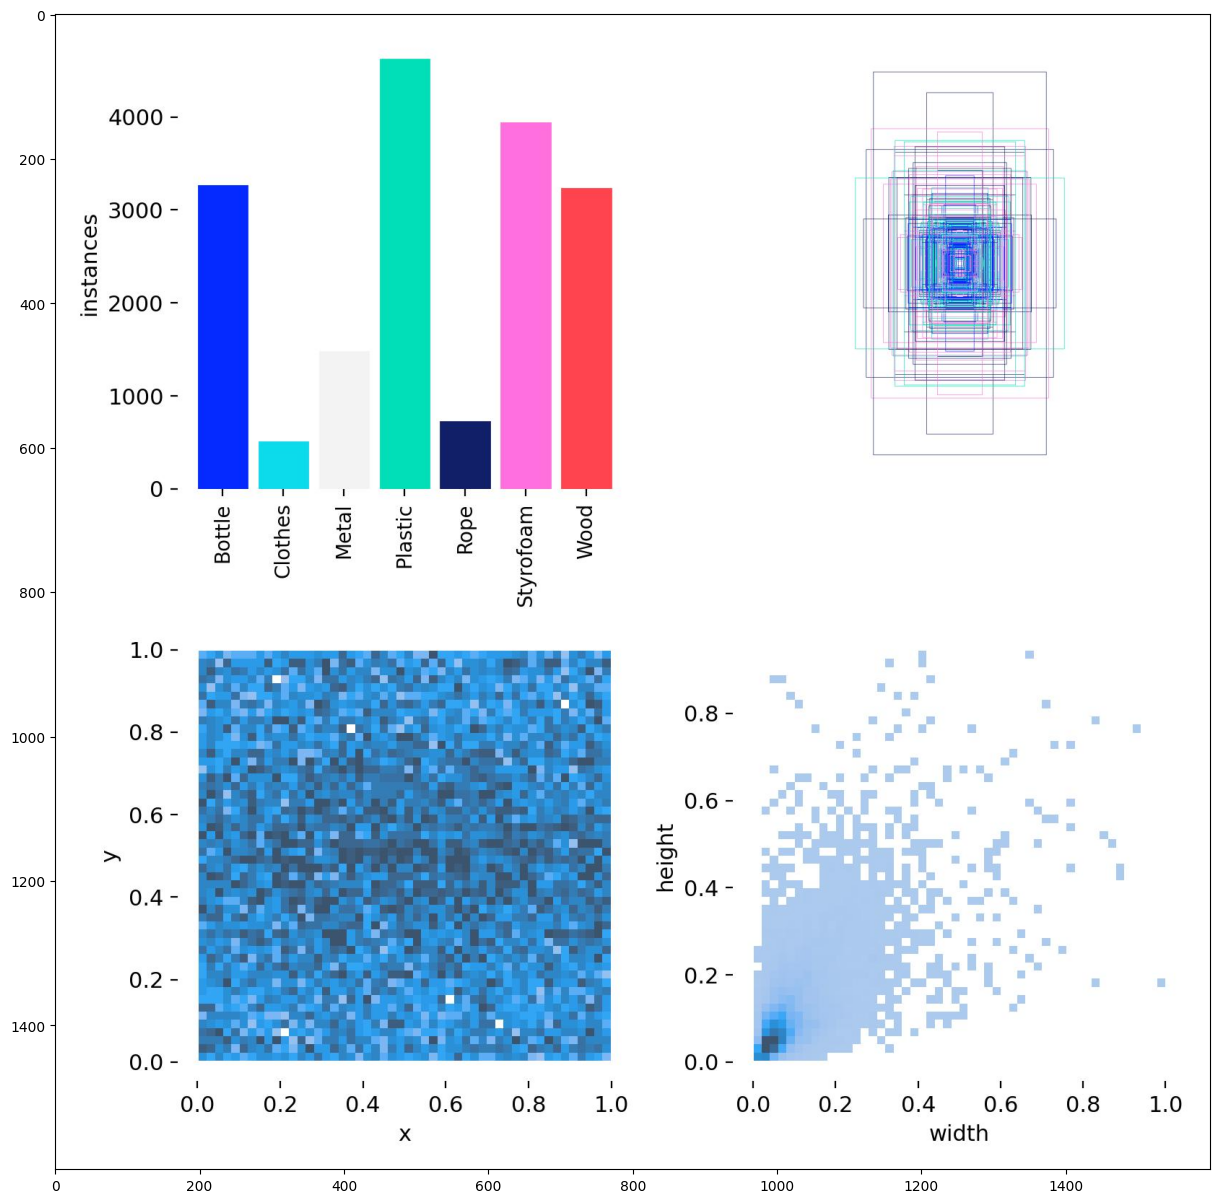

In [13]:
result = plt.imread("/kaggle/working/runs/detect/train/labels.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

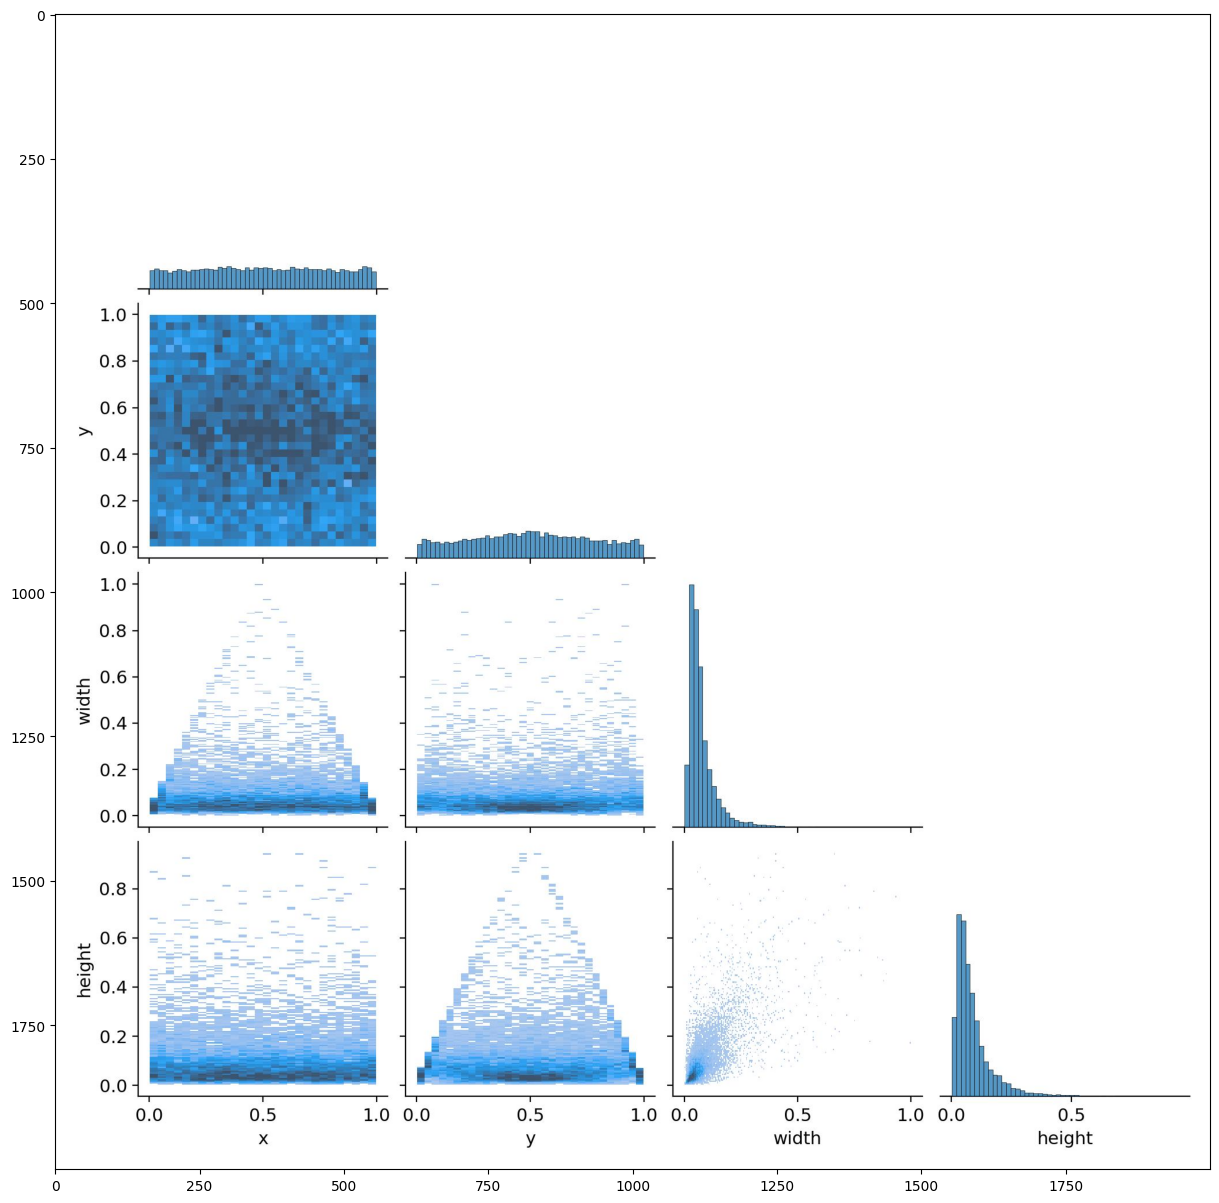

In [14]:
result = plt.imread("/kaggle/working/runs/detect/train/labels_correlogram.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

In [7]:
model = RTDETR("/kaggle/working/runs/detect/train/weights/best.pt")

In [30]:
def prediksi(image, model, label=True, boxs=True, count=False, save=False):
    if save:
        results = model.predict(image, save=True)
    else:
        results = model.predict(image)
    object_detected = False
    object_count = 0

    for result in results:
        boxes = result.boxes.cpu().numpy()
        if len(boxes) == 0:
            continue 
        
        object_detected = True
        for box in boxes:
            object_count += 1
            r = box.xyxy[0].astype(int)
            if boxs:
                print(r)
            
            cv2.rectangle(image, r[:2], r[2:], (0, 255, 0), 2)

            if label:
                box_height = r[3] - r[1]
                font_scale = max(0.5, box_height / 100) 
                font_thickness = max(1, int(box_height / 150)) 

                cls = result.names[int(box.cls[0])]
                text = str(cls)
                (text_width, text_height), baseline = cv2.getTextSize(
                    text, cv2.FONT_HERSHEY_DUPLEX, font_scale, font_thickness
                )
                
                text_x, text_y = r[0], max(r[1], text_height)
                cv2.rectangle(image, (text_x, text_y - text_height - 5), 
                              (text_x + text_width, text_y + baseline - 5), 
                              (0, 255, 0), -1)
                cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX, 
                            font_scale, (0, 0, 0), font_thickness)

    if count:
        cv2.putText(image, f"Trash detected: {object_count}", (5, 30), 
                    cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 255), 2)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()

    if not object_detected:
        print("bersih")

In [31]:
url = "https://www.kimointernational.org/wp/wp-content/uploads/2017/01/P1060092-840x630.jpg"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 4 Bottles, 18 Plastics, 9 Styrofoams, 3 Woods, 55.4ms
Speed: 12.0ms preprocess, 55.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


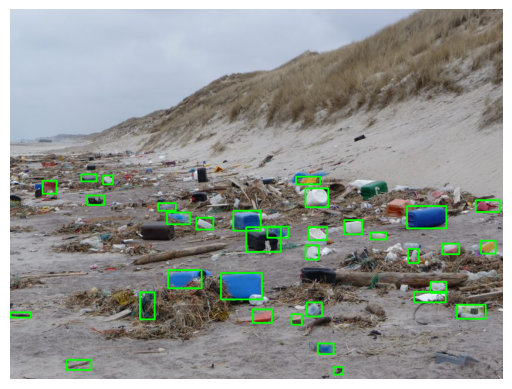

In [32]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg", save=True)
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 4 Bottles, 18 Plastics, 9 Styrofoams, 3 Woods, 58.4ms
Speed: 11.0ms preprocess, 58.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


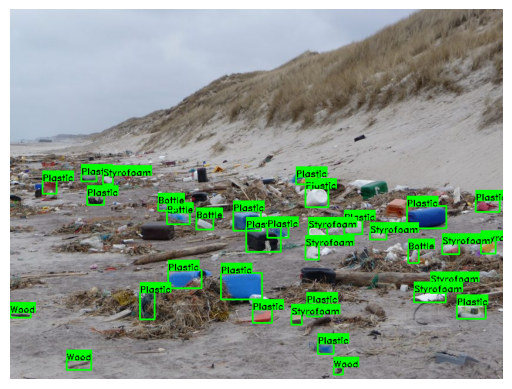

In [15]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False)


0: 640x640 4 Bottles, 18 Plastics, 9 Styrofoams, 3 Woods, 59.5ms
Speed: 10.5ms preprocess, 59.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


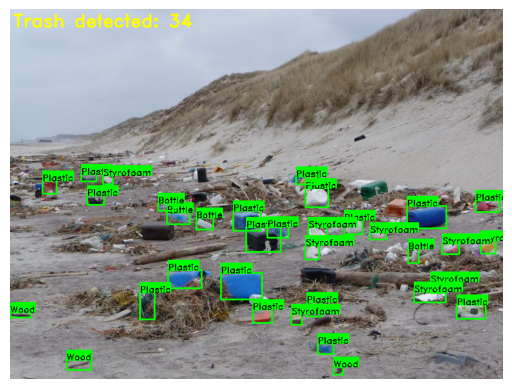

In [16]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False, count=True)

In [19]:
url = "https://www.plasticfreeseas.org/wp-content/uploads/2020/12/Bad-picture-5.png"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 2 Bottles, 7 Plastics, 2 Styrofoams, 53.6ms
Speed: 9.1ms preprocess, 53.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


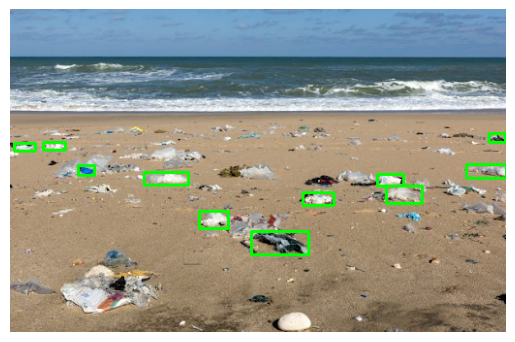

In [20]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 2 Bottles, 7 Plastics, 2 Styrofoams, 55.4ms
Speed: 9.7ms preprocess, 55.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


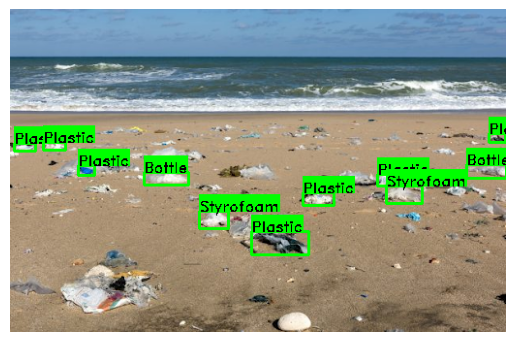

In [21]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False)


0: 640x640 2 Bottles, 7 Plastics, 2 Styrofoams, 60.3ms
Speed: 8.6ms preprocess, 60.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


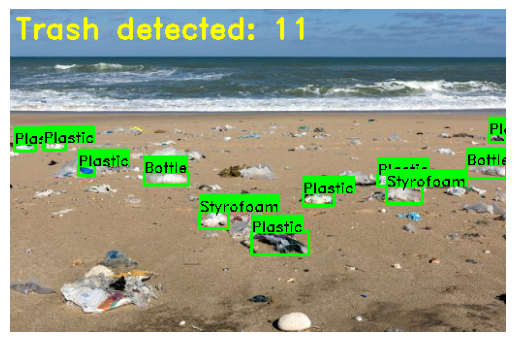

In [22]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False, count=True)

In [23]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3xQXWwvAood6vCChE67bb41d7e_JkzNHtnA&s"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 2 Bottles, 1 Plastic, 55.0ms
Speed: 9.8ms preprocess, 55.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


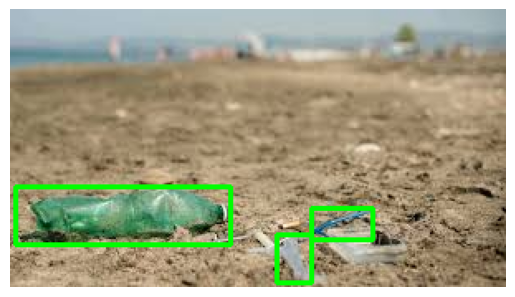

In [24]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 2 Bottles, 1 Plastic, 60.8ms
Speed: 10.7ms preprocess, 60.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


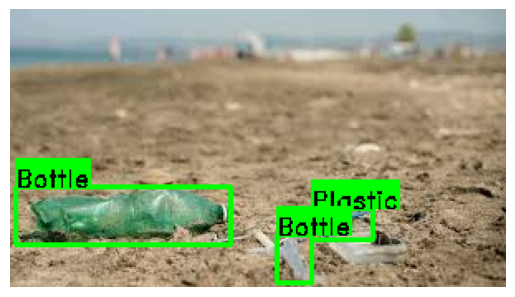

In [25]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False)


0: 640x640 2 Bottles, 1 Plastic, 57.5ms
Speed: 10.8ms preprocess, 57.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


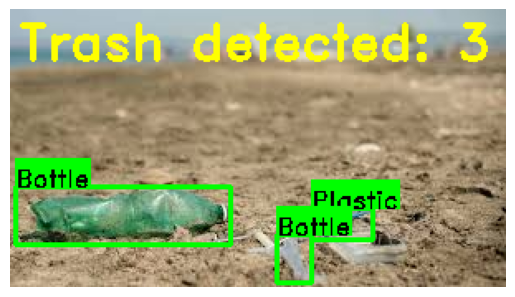

In [26]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False, count=True)

In [27]:
url = "https://cdn.idntimes.com/content-images/post/20151112/tominibay-e4c6aab964fffded0bba8e147e34a048.jpg"
response = requests.get(url)

with open("downloaded_image.jpg", "wb") as file:
    file.write(response.content)

print("File berhasil diunduh.")

File berhasil diunduh.



0: 640x640 (no detections), 59.6ms
Speed: 10.1ms preprocess, 59.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


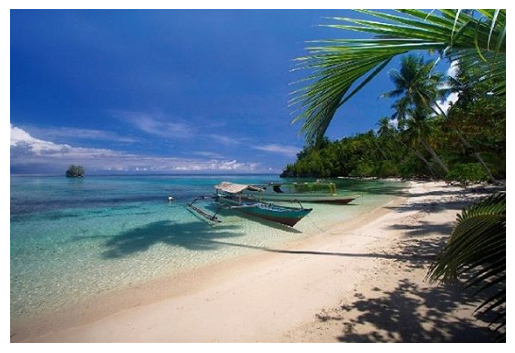

bersih


In [28]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=False, boxs=False)


0: 640x640 (no detections), 59.3ms
Speed: 11.5ms preprocess, 59.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


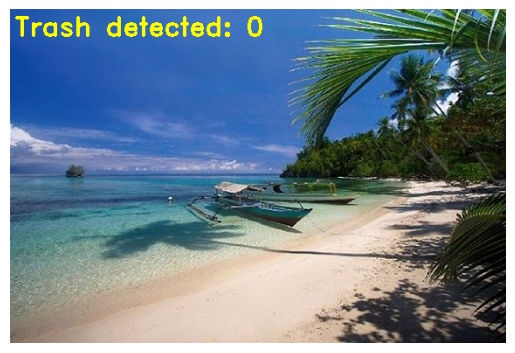

bersih


In [29]:
img_test = cv2.imread("/kaggle/working/downloaded_image.jpg")
prediksi(img_test, model, label=True, boxs=False, count=True)